In [16]:
from ase import * 
from pylab import *
from ase.build import nanotube
from ase.build import graphene_nanoribbon
import plotly.graph_objects as go
from numpy import linalg as LA
from scipy.linalg import ishermitian

In [17]:
KL1 = 365.0 #N/m
KT1 = 245.0 #N/m
KZ1 = 98.2 #N/m

Kbase = array([[KL1,0,0],
            [0,KT1,0],
            [0,0,KZ1]],dtype=complex)

In [82]:
cnt1 = nanotube(6,6, length = 1)

In [83]:
X,Y,Z    = cnt1.get_positions().T
r = cnt1.get_positions()
nsites   = len(X)
a1,a2,a3 = array(cnt1.get_cell())

cluz = 3e10 #cm/
masas = cnt1.get_masses()
masas = 1.66e-27*masas

print(f"nsites = {nsites}")
print(f"    a1 = {a1}")
print(f"    a2 = {a2}")
print(f"    a3 = {a3}")

nsites = 24
    a1 = [0. 0. 0.]
    a2 = [0. 0. 0.]
    a3 = [0.         0.         2.45951215]


In [84]:
def findnn(X,Y,Z):
  nn = {}
  for todos in range(len(X)):

      UnSitio     = array([X[todos],Y[todos],Z[todos]])
      DataUnSitio = kron(ones(nsites),UnSitio)
      DataUnSitio = DataUnSitio.reshape(nsites,3)

      Dif = DataUnSitio - array([X,Y,Z]).T
      normas = []
      for n in range(len(Dif)):
          norm = sqrt(dot(Dif[n],Dif[n]))
          normas.append(norm)
      normas  = array(normas)
      logical = normas<1.44 # distancia en Ang para encontrar los vecinos

      nn[todos] = delete( logical.nonzero()[0], \
          where(logical.nonzero()[0] == todos) )
  return nn

def findnn_minus(X,Y,Z):
  nn_minus_a3 = {}
  for todos in range(len(X)):

      UnSitio     = array([X[todos]+a3[0],Y[todos]+a3[1],Z[todos]+a3[2]])
      DataUnSitio = kron(ones(nsites),UnSitio)
      DataUnSitio = DataUnSitio.reshape(nsites,3)

      Dif = DataUnSitio - array([X,Y,Z]).T
      normas = []
      for n in range(len(Dif)):
          norm = sqrt(dot(Dif[n],Dif[n]))
          normas.append(norm)
      normas  = array(normas)
      logical = normas<1.44 # distancia en Ang para encontrar los vecinos

      nn_minus_a3[todos] = delete( logical.nonzero()[0], \
          where(logical.nonzero()[0] == todos) )
  return nn_minus_a3

def findnn_plus(X,Y,Z):
  nn_plus_a3 = {}
  for todos in range(len(X)):

      UnSitio     = array([X[todos]-a3[0],Y[todos]-a3[1],Z[todos]-a3[2]])
      DataUnSitio = kron(ones(nsites),UnSitio)
      DataUnSitio = DataUnSitio.reshape(nsites,3)

      Dif = DataUnSitio - array([X,Y,Z]).T
      normas = []
      for n in range(len(Dif)):
          norm = sqrt(dot(Dif[n],Dif[n]))
          normas.append(norm)
      normas  = array(normas)
      logical = normas<1.44 # distancia en Ang para encontrar los vecinos

      nn_plus_a3[todos] = delete( logical.nonzero()[0], \
          where(logical.nonzero()[0] == todos) )
  return nn_plus_a3

def GetDATAplot(X,Y,Z,nn,nn_minus_a3,nn_plus_a3):
  DATA = [go.Scatter3d(x=X, y=Y, z=Z,mode='markers',showlegend=False)]

  for key in nn: # para cada sitio
      for n in nn[key]: # para cada vecino
          DATA.append( go.Scatter3d(x=[X[key],X[n]], y=[Y[key],Y[n]], z=[Z[key],Z[n]],mode='lines',line=dict(color='blue'),showlegend=False))

  for key in nn_minus_a3: # para cada sitio
      for n in nn_minus_a3[key]: # para cada vecino
          DATA.append( go.Scatter3d(x=[X[key]+a3[0],X[n]], y=[Y[key]+a3[1],Y[n]], z=[Z[key]+a3[2],Z[n]],mode='lines',line=dict(color='red'),showlegend=False) )

  for key in nn_plus_a3: # para cada sitio
      for n in nn_plus_a3[key]: # para cada vecino
          DATA.append( go.Scatter3d(x=[X[key]-a3[0],X[n]], y=[Y[key]-a3[1],Y[n]], z=[Z[key]-a3[2],Z[n]],mode='lines',line=dict(color='red'),showlegend=False) )

  annos = []
  # for n in range(len(X)):
  for n in range(len(X)):
    anno = dict(x=X[n],
                y=Y[n],
                z=Z[n],
                text=str(n),
                showarrow=False,
                arrowhead=0,
                font=dict(color='black'),
                ax=0,
                ay=0,
                bgcolor="white",
                opacity=0.2)

    annos.append(anno)

  return DATA,annos

In [85]:
nn = findnn(X,Y,Z)
nn_minus_a3= findnn_minus(X,Y,Z)
nn_plus_a3  = findnn_plus(X,Y,Z)

In [163]:
DATA,annos = GetDATAplot(X,Y,Z,nn,nn_minus_a3,nn_plus_a3)
fig = go.Figure(data=DATA)
fig.update_layout(scene=dict(annotations=annos))
# fig.add_annotation(x=X[0], y=Y[0],text="0",showarrow=False,yshift=10)
fig.show()

In [166]:
Prueba(r[1],r[2])

0.0
2.482534153247273e-16
[[-1.46828677e+01+0.j  1.23203889e+01+0.j -1.00166071e+01+0.j]
 [ 1.23203889e+01+0.j  1.46828677e+01+0.j -4.67082060e+00+0.j]
 [-1.00166071e+01+0.j -4.67082060e+00+0.j -1.13686838e-13+0.j]]


In [165]:
def Prueba(r1,r2):

    # Parte correspondiente al c

    X = array([r1[0],r2[0]])
    Y = array([r1[1],r2[1]])
    Z = array([r1[2],r2[2]])

    x1,y1,z1 = r1[0],r1[1],r1[2]
    x2,y2,z2 = r2[0],r2[1],r2[2]

    x12 = x2 - x1
    y12 = y2 - y1
    z12 = z2 - z1

    # --------------------------------------------------------------------------------------------
    
    # Parte correspondiente al cálculo de la matriz de resortes de 1. 

    rij1 = array([x12,y12,z12])

    zhat = [0,0,1]

    ρhat1 = [x1,y1,0]/LA.norm([x1,y1,0])
    θhat1 = np.cross(zhat,ρhat1)

    M1 = array([θhat1,zhat,ρhat1]).T #Matriz de cambio de base

    φ1 = arcsin(dot(rij1,ρhat1)/LA.norm(rij1))  #Angulo que hace Kx con el plano perpendicular a rho.

    T1 = array([[cos(φ1) ,0.  ,-sin(φ1)],
                    [0.     ,1.  ,0],
                    [sin(φ1),0.  ,cos(φ1)]],dtype = complex)

    w1 = rij1 - dot(rij1,ρhat1)*ρhat1 #Componente del vector dentro del plano

    xi1 = dot(rij1,θhat1)
    yi1 = dot(rij1,zhat)

    θ1 = sign(yi1)*arccos(xi1/sqrt(xi1**2 + yi1**2))

    U1 = array([[cos(θ1),-sin(θ1),0],
                [sin(θ1),cos(θ1),0],
                [       0,      0,1]],dtype = complex)
    
    θhatrot1 = real(dot(M1,dot(U1,dot(T1,[1,0,0]))))
    zhatrot1 = real(dot(M1,dot(U1,dot(T1,[0,1,0]))))
    ρhatrot1 = real(dot(M1,dot(U1,dot(T1,[0,0,1]))))

    print(LA.norm(cross(rij1,θhatrot1)))

    #print(sign(dot(rij1,θhat1)))
    # --------------------------------------------------------------------------------------------
    
    # Parte correspondiente al cálculo de la matriz de resortes de 1. 

    rij2 = -1*rij1

    ρhat2 = [x2,y2,0]/LA.norm([x2,y2,0])
    θhat2 = np.cross(zhat,ρhat2)

    M2 = array([θhat2,zhat,ρhat2]).T #Matriz de cambio de base


    φ2 = (arcsin(dot(rij2,ρhat2)/LA.norm(rij2))) #Angulo que hace Kx con el plano perpendicular a rho.


    T2 = array([[cos(φ2) ,0.  ,-sin(φ2)],
                    [0.     ,1.  ,0],
                    [sin(φ2),0.  ,cos(φ2)]],dtype = complex)

    w2 = rij2 - dot(rij2,ρhat2)*ρhat2 #Componente del vector dentro del plano

    xi2 = dot(rij2,θhat2)
    yi2 = dot(rij2,zhat)

    θ2 = sign(yi2)*arccos(xi2/sqrt(xi2**2 + yi2**2))

    U2 = array([[cos(θ2),-sin(θ2),0],
                [sin(θ2),cos(θ2),0],
                [       0,      0,1]],dtype = complex)
    
    θhatrot2 = real(dot(M2,dot(U2,dot(T2,[1,0,0]))))
    zhatrot2 = real(dot(M2,dot(U2,dot(T2,[0,1,0]))))
    ρhatrot2 = real(dot(M2,dot(U2,dot(T2,[0,0,1]))))

    print(LA.norm(cross(rij2,θhatrot2)))

    #---------------------------------------------------------------------------------------------
    # Comparación de tensores

    Krotplano1 = dot(T1,dot(Kbase,inv(T1)))
    Krotpolar1 = dot(U1,dot(Krotplano1,inv(U1)))
    K1 = dot(M1,dot(Krotpolar1,inv(M1)))

    Krotplano2 = dot(T2,dot(Kbase,inv(T2)))
    Krotpolar2 = dot(U2,dot(Krotplano2,inv(U2)))
    K2 = dot(M2,dot(Krotpolar2,inv(M2)))

    print(K1 - K2)


    # --------------------------------------------------------------------------------------------
    
    # Parte correspondiente a la graficación de vectores base y vectores base rotado visto desde el origen. 

    DATAPrueba = [go.Scatter3d(x=X, y=Y, z=Z,mode='markers',showlegend=False)]
    DATAPrueba.append( go.Scatter3d(x=[0], y=[0], z=[Z[0]],mode='markers'))
    DATAPrueba.append( go.Scatter3d(x=[X[0],X[1]], y=[Y[0],Y[1]], z=[Z[0],Z[1]],mode='lines',line=dict(color='dark blue'),showlegend=False))

    # Se dibuja la base de la base asociada al punto r1. 
    DATAPrueba.append( go.Scatter3d(x=[X[0],X[0]], y=[Y[0],Y[0]], z=[Z[0],Z[0] + 1],mode='lines',line=dict(color='grey'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[0],X[0] + ρhat1[0]], y=[Y[0],Y[0] + ρhat1[1]], z=[Z[0],Z[0] + ρhat1[2]],mode='lines',line=dict(color='grey'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[0],X[0] + θhat1[0]], y=[Y[0],Y[0] + θhat1[1]], z=[Z[0],Z[0] + θhat1[2]],mode='lines',line=dict(color='grey'),showlegend=False))

    DATAPrueba.append( go.Scatter3d(x=[X[0] - zhatrot1[0],X[0] + zhatrot1[0]], y=[Y[0] - zhatrot1[1],Y[0] + zhatrot1[1]], z=[Z[0] - zhatrot1[2],Z[0] + zhatrot1[2]],mode='lines',line=dict(color='black'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[0] - ρhatrot1[0],X[0] + ρhatrot1[0]], y=[Y[0] - ρhatrot1[1],Y[0] + ρhatrot1[1]], z=[Z[0] - ρhatrot1[2],Z[0] + ρhatrot1[2]],mode='lines',line=dict(color='magenta'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[0] - θhatrot1[0],X[0] + θhatrot1[0]], y=[Y[0] - θhatrot1[1],Y[0] + θhatrot1[1]], z=[Z[0] - θhatrot1[2],Z[0] + θhatrot1[2]],mode='lines',line=dict(color='purple'),showlegend=False))

    # Se dibuja la base de la base asociada al punto r2. 
    DATAPrueba.append( go.Scatter3d(x=[X[1],X[1]], y=[Y[1],Y[1]], z=[Z[1],Z[1] + 1],mode='lines',line=dict(color='grey'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[1],X[1] + ρhat2[0]], y=[Y[1],Y[1] + ρhat2[1]], z=[Z[1],Z[1] + ρhat2[2]],mode='lines',line=dict(color='grey'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[1],X[1] + θhat2[0]], y=[Y[1],Y[1] + θhat2[1]], z=[Z[1],Z[1] + θhat2[2]],mode='lines',line=dict(color='grey'),showlegend=False))

    DATAPrueba.append( go.Scatter3d(x=[X[1] - zhatrot2[0],X[1] + zhatrot2[0]], y=[Y[1] - zhatrot2[1],Y[1] + zhatrot2[1]], z=[Z[1] - zhatrot2[2],Z[1] + zhatrot2[2]],mode='lines',line=dict(color='black'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[1] - ρhatrot2[0],X[1] + ρhatrot2[0]], y=[Y[1] - ρhatrot2[1],Y[1] + ρhatrot2[1]], z=[Z[1] - ρhatrot2[2],Z[1] + ρhatrot2[2]],mode='lines',line=dict(color='magenta'),showlegend=False))
    DATAPrueba.append( go.Scatter3d(x=[X[1] - θhatrot2[0],X[1] + θhatrot2[0]], y=[Y[1] - θhatrot2[1],Y[1] + θhatrot2[1]], z=[Z[1] - θhatrot2[2],Z[1] + θhatrot2[2]],mode='lines',line=dict(color='purple'),showlegend=False))
    
    
    fig = go.Figure(data=DATAPrueba)
    fig.show()

    # --------------------------------------------------------------------------------------------
    
    # Parte correspondiente la comparación de vectores base visto desde el mismo punto

    CompTens = [ go.Scatter3d(x=[- rij1[0],rij1[0]], y=[-rij1[1],rij1[1]], z=[-rij1[2],rij1[2]],mode='lines',line=dict(color='yellow'),showlegend=False)]

    CompTens.append( go.Scatter3d(x=[- zhatrot1[0],zhatrot1[0]], y=[-zhatrot1[1],zhatrot1[1]], z=[-zhatrot1[2],zhatrot1[2]],mode='lines',line=dict(color='black'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- ρhatrot1[0],ρhatrot1[0]], y=[-ρhatrot1[1],ρhatrot1[1]], z=[-ρhatrot1[2],ρhatrot1[2]],mode='lines',line=dict(color='magenta'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- 1.1*θhatrot1[0],1.1*θhatrot1[0]], y=[-1.1*θhatrot1[1],1.1*θhatrot1[1]], z=[-1.1*θhatrot1[2],1.1*θhatrot1[2]],mode='lines',line=dict(color='green'),showlegend=False))

    CompTens.append( go.Scatter3d(x=[- zhatrot2[0],zhatrot2[0]], y=[-zhatrot2[1],zhatrot2[1]], z=[-zhatrot2[2],zhatrot2[2]],mode='lines',line=dict(color='grey'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- ρhatrot2[0],ρhatrot2[0]], y=[-ρhatrot2[1],ρhatrot2[1]], z=[-ρhatrot2[2],ρhatrot2[2]],mode='lines',line=dict(color='violet'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- θhatrot2[0],θhatrot2[0]], y=[-θhatrot2[1],θhatrot2[1]], z=[-θhatrot2[2],θhatrot2[2]],mode='lines',line=dict(color='palegreen'),showlegend=False))

    CompTens.append(go.Scatter3d(x=[- zhat[0],zhat[0]], y=[-zhat[1],zhat[1]], z=[-zhat[2],zhat[2]],mode='lines',line=dict(color='skyblue'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- ρhat1[0],ρhat1[0]], y=[-ρhat1[1],ρhat1[1]], z=[-ρhat1[2],ρhat1[2]],mode='lines',line=dict(color='darkblue'),showlegend=False))
    CompTens.append( go.Scatter3d(x=[- θhat1[0],θhat1[0]], y=[-θhat1[1],θhat1[1]], z=[-θhat1[2],θhat1[2]],mode='lines',line=dict(color='dodgerblue'),showlegend=False))

    fig2 = go.Figure(data=CompTens)
    fig2.show()

    CompTens2 = [ go.Scatter3d(x=[- rij1[0],rij1[0]], y=[-rij1[1],rij1[1]], z=[-rij1[2],rij1[2]],mode='lines',line=dict(color='yellow'),showlegend=False)]

    CompTens2.append( go.Scatter3d(x=[- zhatrot1[0],zhatrot1[0]], y=[-zhatrot1[1],zhatrot1[1]], z=[-zhatrot1[2],zhatrot1[2]],mode='lines',line=dict(color='black'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- ρhatrot1[0],ρhatrot1[0]], y=[-ρhatrot1[1],ρhatrot1[1]], z=[-ρhatrot1[2],ρhatrot1[2]],mode='lines',line=dict(color='magenta'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- 1.1*θhatrot1[0],1.1*θhatrot1[0]], y=[-1.1*θhatrot1[1],1.1*θhatrot1[1]], z=[-1.1*θhatrot1[2],1.1*θhatrot1[2]],mode='lines',line=dict(color='green'),showlegend=False))

    CompTens2.append( go.Scatter3d(x=[- zhatrot2[0],zhatrot2[0]], y=[-zhatrot2[1],zhatrot2[1]], z=[-zhatrot2[2],zhatrot2[2]],mode='lines',line=dict(color='grey'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- ρhatrot2[0],ρhatrot2[0]], y=[-ρhatrot2[1],ρhatrot2[1]], z=[-ρhatrot2[2],ρhatrot2[2]],mode='lines',line=dict(color='violet'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- θhatrot2[0],θhatrot2[0]], y=[-θhatrot2[1],θhatrot2[1]], z=[-θhatrot2[2],θhatrot2[2]],mode='lines',line=dict(color='palegreen'),showlegend=False))

    CompTens2.append( go.Scatter3d(x=[- zhat[0],zhat[0]], y=[-zhat[1],zhat[1]], z=[-zhat[2],zhat[2]],mode='lines',line=dict(color='skyblue'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- ρhat2[0],ρhat2[0]], y=[-ρhat2[1],ρhat2[1]], z=[-ρhat2[2],ρhat2[2]],mode='lines',line=dict(color='darkblue'),showlegend=False))
    CompTens2.append( go.Scatter3d(x=[- θhat2[0],θhat2[0]], y=[-θhat2[1],θhat2[1]], z=[-θhat2[2],θhat2[2]],mode='lines',line=dict(color='dodgerblue'),showlegend=False))

    fig3 = go.Figure(data=CompTens2)
    fig3.show()

In [60]:
def RotBasisVec(r1,r2,B = False):
    X = array([r1[0],r2[0]])
    Y = array([r1[1],r2[1]])
    Z = array([r1[2],r2[2]])

    x1,y1,z1 = r1[0],r1[1],r1[2]
    x2,y2,z2 = r2[0],r2[1],r2[2]

    x12 = x2 - x1
    y12 = y2 - y1
    z12 = z2 - z1

    # --------------------------------------------------------------------------------------------
    
    # Parte correspondiente al cálculo de la matriz de resortes de 1. 

    rij1 = array([x12,y12,z12])

    zhat = [0,0,1]

    ρhat1 = [x1,y1,0]/LA.norm([x1,y1,0])
    θhat1 = np.cross(zhat,ρhat1)

    M1 = array([θhat1,zhat,ρhat1]).T #Matriz de cambio de base

    φ1 = arcsin(dot(rij1,ρhat1)/LA.norm(rij1))  #Angulo que hace Kx con el plano perpendicular a rho.

    T1 = array([[cos(φ1) ,0.  ,-sin(φ1)],
                    [0.     ,1.  ,0],
                    [sin(φ1),0.  ,cos(φ1)]],dtype = complex)

    w1 = rij1 - dot(rij1,ρhat1)*ρhat1 #Componente del vector dentro del plano

    xi1 = dot(rij1,θhat1)
    yi1 = dot(rij1,zhat)

    θ1 = sign(yi1)*arccos(xi1/sqrt(xi1**2 + yi1**2))

    U1 = array([[cos(θ1),-sin(θ1),0],
                [sin(θ1),cos(θ1),0],
                [       0,      0,1]],dtype = complex)
    
    θhatrot1 = real(dot(M1,dot(U1,dot(T1,[1,0,0]))))
    zhatrot1 = real(dot(M1,dot(U1,dot(T1,[0,1,0]))))
    ρhatrot1 = real(dot(M1,dot(U1,dot(T1,[0,0,1]))))

    

    Basis = [zhat,ρhat1,θhat1]

    RotBasis = [θhatrot1,zhatrot1,ρhatrot1]

    return Basis,RotBasis

In [61]:
DATA = [go.Scatter3d(x=X, y=Y, z=Z,mode='markers',showlegend=False)]

for key in nn: # para cada sitio
    for n in nn[key]: # para cada vecino
        VecBasis,VecRot = RotBasisVec(r[key],r[n])

        DATA.append( go.Scatter3d(x=[X[key],X[n]], y=[Y[key],Y[n]], z=[Z[key],Z[n]],mode='lines',line=dict(color='blue'),showlegend=False))

        for vec in VecBasis:
            DATA.append(go.Scatter3d(x=[X[key],X[key] + vec[0]], y=[Y[key] ,Y[key] + vec[1]], z=[Z[key],Z[key] + vec[2]],mode='lines',line=dict(color='black'),showlegend=False))

        for vec in VecRot:
            DATA.append(go.Scatter3d(x=[X[key],X[key] + vec[0]], y=[Y[key] ,Y[key] + vec[1]], z=[Z[key],Z[key] + vec[2]],mode='lines',line=dict(color='green'),showlegend=False))

for key in nn_minus_a3: # para cada sitio
    for n in nn_minus_a3[key]: # para cada vecino
        DATA.append( go.Scatter3d(x=[X[key]+a3[0],X[n]], y=[Y[key]+a3[1],Y[n]], z=[Z[key]+a3[2],Z[n]],mode='lines',line=dict(color='red'),showlegend=False) )

for key in nn_plus_a3: # para cada sitio
    for n in nn_plus_a3[key]: # para cada vecino
        DATA.append( go.Scatter3d(x=[X[key]-a3[0],X[n]], y=[Y[key]-a3[1],Y[n]], z=[Z[key]-a3[2],Z[n]],mode='lines',line=dict(color='red'),showlegend=False) )

In [62]:
fig = go.Figure(data=DATA)
fig.show()

In [48]:
dif = Prueba(r[1],r[2])

2.3714374201337736e-16
1.1443916996305594e-16


In [30]:
def KGeneral(r1,r2):

  x1,y1,z1 = r1[0],r1[1],r1[2]
  x2,y2,z2 = r2[0],r2[1],r2[2]

  x12 = x2 - x1
  y12 = y2 - y1
  z12 = z2 - z1

  rij = array([x12,y12,z12])

  zhat = array([0,0,1])
  ρhat = array([x1,y1,0])/LA.norm(array([x1,y1,0]))
  θhat = np.cross(zhat,ρhat)

  M = array([θhat,zhat,ρhat]).T #Matriz de cambio de base

  φ = arcsin(dot(rij,ρhat)/LA.norm(rij)) #Angulo que hace Kx con el plano perpendicular a rho.

  T = array([[cos(φ) ,0.  ,-sin(φ)],
                [0.     ,1.  ,0],
                [sin(φ),0.  ,cos(φ)]],dtype = complex)

  #w = rij - dot(rij,ρhat)*ρhat 
  xi = dot(rij,θhat)
  yi = dot(rij,zhat)

  θ = sign(yi)*arccos(xi/sqrt(xi**2 + yi**2))

  U = array([[cos(θ),-sin(θ),0],
              [sin(θ),cos(θ),0],
              [       0,      0,1]],dtype = complex)

  """print(f"φ = {φ*180/pi}")
  print(f"θ = {θ*180/pi}")
  print(f"θhat = {θhat}")
  print(f"ρhat = {ρhat}")"""


  Krotplano = dot(T,dot(Kbase,inv(T)))
  Krotpolar = dot(U,dot(Krotplano,inv(U)))

  """print(f"Vector θhat rotado = {dot(M,dot(T,dot(U,[1,0,0])))}")
  print(f"Vector ρhat rotado = {dot(M,dot(T,dot(U,[0,0,1])))}")
  print(f"Vector zhat rotado = {dot(M,dot(T,dot(U,[0,1,0])))}")"""


  #return dot(M,dot(Krotpolar,inv(M)))
  return Krotpolar



In [31]:
def OperadorPseudomomento(n):

  Sz = array([[0,-1J,0],
              [1J,0,0],
              [0,0,0]],dtype=complex)

  return np.kron(np.eye(n,dtype=complex),Sz)

In [32]:
def expectedval(vec,S):
    return dot(np.conj(vec).T,dot(S,vec)).real

In [33]:
S = OperadorPseudomomento(nsites)

In [34]:
MatrizDinamica = {}
MatInt = array(range(nsites*nsites)).reshape(nsites,nsites)

for i in range(len(X)):

  #print("Esta es la iteración de i =",str(i))
  MatrizDinamica[(nsites)*i + i] = "Kgiad de " + str(i)

  for j in range(i+1,len(X)):
    rj = [X[j],Y[j],Z[j]]
    if j in nn[i]:
      #print("Elemento fuera de la diagonal de primer vecino asociado a átomos",str(i),str(j))
      MatrizDinamica[(nsites)*i + j] = "Interacción: (" + str(i) + "," + str(j)+"), intracelda"
      MatrizDinamica[(nsites)*j + i] = "Interacción: (" + str(j) + "," + str(i)+"), intracelda"
    elif j in nn_plus_a3[i]:
      #print("Elemento fuera de la diagonal de primer vecino plus asociado a átomos",str(i),str(j))
      MatrizDinamica[(nsites)*i + j] = "Interacción: (" + str(i) + "," + str(j)+"), celda plus"
      MatrizDinamica[(nsites)*j + i] = "Interacción: (" + str(i) + "," + str(j)+"), celda plus"
    elif j in nn_minus_a3[i]:
      #print("Elemento fuera de la diagonal de primer vecino minus asociado a átomos",str(i),str(j))
      MatrizDinamica[(nsites)*i + j] = "Interacción: (" + str(i) + "," + str(j)+"), celda minus"
      MatrizDinamica[(nsites)*j + i] = "Interacción: (" + str(i) + "," + str(j)+"), celda minus"
    else:
        MatrizDinamica[(nsites)*i + j] = "No int"
        MatrizDinamica[(nsites)*j + i] = "No int"

    """for j in range(i):
      MatrizDinamica[(nsites)*i + j] = np.zeros((3,3))"""

MatrizDinamica = dict(sorted(MatrizDinamica.items()))

In [35]:
def Eigenfrequencies(kvec):
  MatrizDinamica = {}
  MatInt = array(range(nsites*nsites)).reshape(nsites,nsites)

  for i in range(len(X)):

    #print("Esta es la iteración de i =",str(i))

    ri = [X[i],Y[i],Z[i]]

    Kdiagi = np.zeros((3,3))

    for n in nn[i]:
      #print("Vecino cercano de átomo",str(i),"número",str(n))
      rn = [X[n],Y[n],Z[n]]
      Kdiagi = Kdiagi + KGeneral(ri,rn)
    for n in nn_plus_a3[i]:
      #print("Vecino cercano plus de átomo",str(i),"número",str(n))
      rn = [X[n],Y[n],Z[n]] + a3
      Kdiagi = Kdiagi + KGeneral(ri,rn)
    for n in nn_minus_a3[i]:
      #print("Vecino cercano minus de átomo",str(i),"número",str(n))
      rn = [X[n],Y[n],Z[n]] - a3
      Kdiagi = Kdiagi + KGeneral(ri,rn)


    """for n in np.concatenate((nn[i], nn_plus_a3[i],nn_minus_a3[i])):
      rn = [X[n],Y[n],Z[n]] + a3
      Kdiagi = Kdiagi + KGeneral(Kx,ri,rn)"""

    MatrizDinamica[(nsites)*i + i] = Kdiagi/masas[i]

    for j in range(i+1,len(X)):
      rj = [X[j],Y[j],Z[j]]
      if j in nn[i]:
        K = -1*KGeneral(ri,rj)/sqrt(masas[i]*masas[j])
        #print("Elemento fuera de la diagonal de primer vecino asociado a átomos",str(i),str(j))
        MatrizDinamica[(nsites)*i + j] = -1*KGeneral(ri,rj)/sqrt(masas[i]*masas[j])
        MatrizDinamica[(nsites)*j + i] = K.T
      elif j in nn_plus_a3[i]:
        K = -1*KGeneral(ri,rj + a3)/sqrt(masas[i]*masas[j])
        #print("Elemento fuera de la diagonal de primer vecino plus asociado a átomos",str(i),str(j))
        MatrizDinamica[(nsites)*i + j] = K*exp(1J*kvec)
        MatrizDinamica[(nsites)*j + i] = K*exp(-1J*kvec)
        #MatrizDinamica[(nsites)*j + i] = (-1*KGeneral(ri,rj + a3)/sqrt(masas[i]*masas[j])*exp(-1J*kvec))
      elif j in nn_minus_a3[i]:
        K = -1*KGeneral(ri,rj - a3)/sqrt(masas[i]*masas[j])
        #print("Elemento fuera de la diagonal de primer vecino minus asociado a átomos",str(i),str(j))
        MatrizDinamica[(nsites)*i + j] = K*exp(-1J*kvec)
        #MatrizDinamica[(nsites)*j + i] = (-1*KGeneral(ri,rj - a3)/sqrt(masas[i]*masas[j])*exp(1J*kvec))
        MatrizDinamica[(nsites)*j + i] = K*exp(1J*kvec)
      else:
          MatrizDinamica[(nsites)*i + j] = np.zeros((3,3))
          MatrizDinamica[(nsites)*j + i] = np.zeros((3,3))

    """for j in range(i):
      MatrizDinamica[(nsites)*i + j] = np.zeros((3,3))"""

  MatrizDinamica = dict(sorted(MatrizDinamica.items()))

  Dm = [ [MatrizDinamica[i] for i in rw] for rw in MatInt ]
  Dynamical = asarray(np.bmat(Dm))

  ω2,eigvecs = eigh(Dynamical)

  pseudomom = []


  for i in range(len(ω2)):
    eigvec = eigvecs[:,i]
    pseudomom.append(expectedval(eigvec,S))


  return sqrt(abs(ω2))/2/pi/cluz,pseudomom

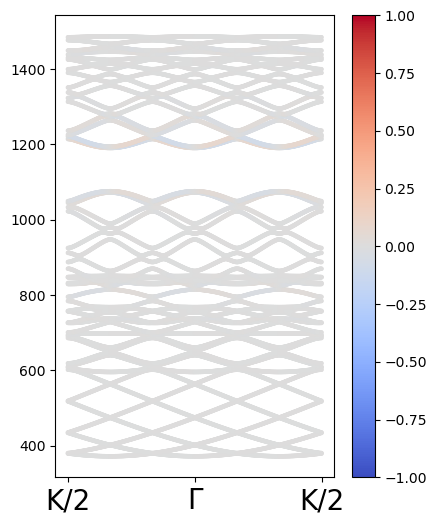

In [36]:
Kpoints = np.linspace(-pi,pi,500)

Klabels = [r"K/2",r"Γ",r"K/2"]
Kticks = concatenate([[0],[250],[500]])

Bandas = []
Pseudomom = []

Kevaluate = (list( map(Eigenfrequencies,Kpoints) ))

for ω2,psmom in Kevaluate:
  Bandas.append(ω2)
  Pseudomom.append(psmom)

Bandas = array(Bandas)
Pseudomom = array(Pseudomom)

numK,nbands = shape(Bandas)
kenum = arange(numK)

fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4.5,6))
for j in range(nbands):
  grafica = ax.scatter(kenum,Bandas.T[j],c = Pseudomom.T[j],cmap = "coolwarm",vmax = 1, vmin = -1,s = 5)
fig.colorbar(grafica)
ax.set_xticks(Kticks)
#ax.set_ylim(1,100)
ax.set_xticklabels(Klabels,fontsize = 20);

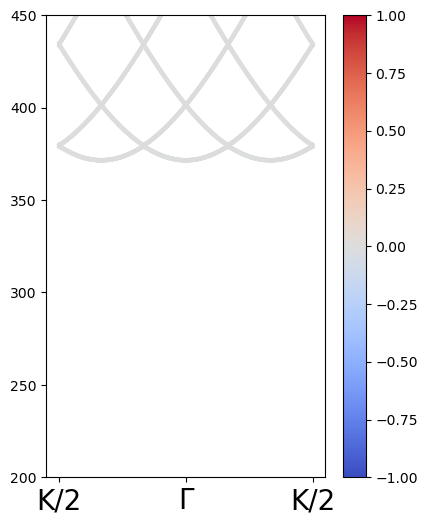

In [37]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4.5,6))
for j in range(nbands):
  grafica = ax.scatter(kenum,Bandas.T[j],c = Pseudomom.T[j],cmap = "coolwarm",vmax = 1, vmin = -1,s = 5)
fig.colorbar(grafica)
ax.set_xticks(Kticks)
ax.set_ylim(200,450)
ax.set_xticklabels(Klabels,fontsize = 20);